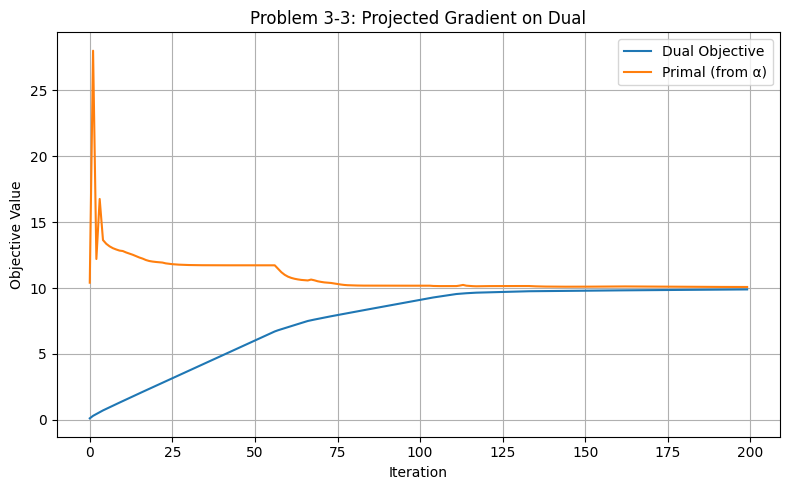

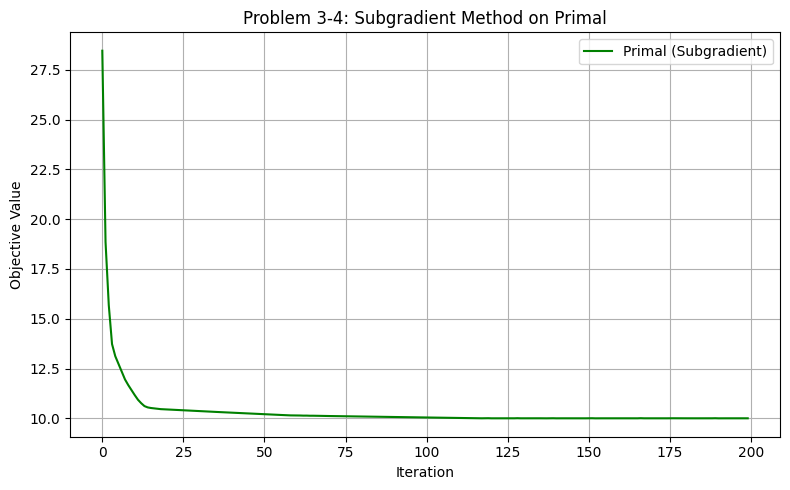

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- データ生成 ---
np.random.seed(0)
n = 40
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = 2 * ((omega * x[:, 0:1] + x[:, 1:2] + noise) > 0) - 1
y = y.flatten()

# --- ハイパーパラメータ ---
lam = 0.1
eta = 0.01
max_iter = 200

# --- カーネル行列 K = y_i y_j x_i^T x_j ---
K = (y[:, None] * x) @ (y[:, None] * x).T  # shape: (n, n)

# --- 小問3: 双対問題の Projected Gradient 法 ---
alpha = np.zeros(n)
dual_losses = []
primal_losses_from_dual = []

for t in range(max_iter):
    grad = (1 / (2 * lam)) * (K @ alpha) - 1
    alpha = alpha - eta * grad
    alpha = np.clip(alpha, 0, 1)  # プロジェクション P[0,1]

    # w を双対解から復元
    w_dual = (1 / (2 * lam)) * ((alpha * y) @ x)
    # w_dual = ((alpha * y) @ X)

    # 双対目的関数
    dual_obj = - (1 / (4 * lam)) * alpha @ (K @ alpha) + np.sum(alpha)
    dual_losses.append(dual_obj)

    # 主目的関数（dual w を用いた評価）
    margins = 1 - y * (x @ w_dual)
    hinge = np.maximum(0, margins)
    primal_obj = np.sum(hinge) + lam * np.linalg.norm(w_dual) ** 2
    primal_losses_from_dual.append(primal_obj)

# --- 小問4: 主問題を Subgradient 法で最適化 ---
w = np.zeros(x.shape[1])
subgrad_losses = []

for t in range(max_iter):
    margins = 1 - y * (x @ w)
    subgrad = np.zeros_like(w)
    for i in range(n):
        if margins[i] > 0:
            subgrad -= y[i] * x[i]
    subgrad += 2 * lam * w
    w -= eta * subgrad

    # 主目的関数値の記録
    hinge = np.maximum(0, 1 - y * (x @ w))
    primal_obj = np.sum(hinge) + lam * np.linalg.norm(w) ** 2
    subgrad_losses.append(primal_obj)

# --- 小問3の図：DualとDualから得たPrimal ---
plt.figure(figsize=(8, 5))
plt.plot(dual_losses, label='Dual Objective')
plt.plot(primal_losses_from_dual, label='Primal (from α)')
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Problem 3-3: Projected Gradient on Dual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 小問4の図：SubgradientによるPrimal最適化 ---
plt.figure(figsize=(8, 5))
plt.plot(subgrad_losses, label='Primal (Subgradient)', color='green')
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Problem 3-4: Subgradient Method on Primal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
